In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [54]:
#defining functions
def Linear_Model(theta0, theta1, x): #Linear function
    return theta0 + theta1 * x


def Objective_Function(m, theta0, theta1):#object function (loss function)
    result = 0
    for i in m:
        result += (Linear_Model(theta0, theta1, i[0]) - i[1])**2
    result /= 2* len(m)
    return result


def Gradient_Descent(m, lr, theta0, theta1): # derivative of loss funciton 
    temp = 0
    for i in m:
        temp += (Linear_Model(theta0, theta1, i[0]) - i[1])
    new_theta0 = theta0 - lr * temp / len(m)
    
    temp = 0
    for i in m:
        temp += (Linear_Model(theta0, theta1, i[0]) - i[1])*i[0]
    new_theta1 = theta1 - lr * temp / len(m)
    
    theta0 = new_theta0
    theta1 = new_theta1 #theta0 and theta1 should be updated simultaneously, after calculation
    
    return theta0, theta1

# Input data

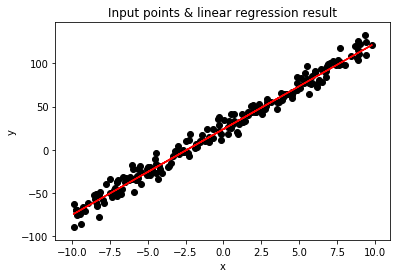

In [64]:
path = "data.csv"
#data loaded from "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

m = []
for i in range(len(x_data)):
    m.append((x_data[i],y_data[i]))
    
lr = 0.01 # let learning rate 0.01
theta0 = random.uniform(1,3) #randomly initializing theta0, theta1 (parameters)
theta1 = random.uniform(1,3)
of_val = [] #object function value
theta = [] #contains theta values during each step

itermax = 1000
itercount = 0
while True: # changing theta values using gradient descent
    
    if itercount >= itermax: #if more than 1000 iter, break the loop
        break
    
    old_theta0, old_theta1 = theta0, theta1
    of_val.append(Objective_Function(m, theta0, theta1))
    theta0, theta1 = Gradient_Descent(m,lr,theta0,theta1)
    theta.append((theta0, theta1))
    
    if abs(old_theta0 - theta0) < 0.01 and abs(old_theta1 - theta1) < 0.01: #check if the value converges
        break
    
    itercount += 1
    

x = x_data
y = theta0 + theta1 * x

plt.title('Input points & linear regression result')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, c= 'r')
plt.scatter(x_data, y_data, c= 'k') 
plt.show() #input points with linear regression result

# Plotting the energy values 

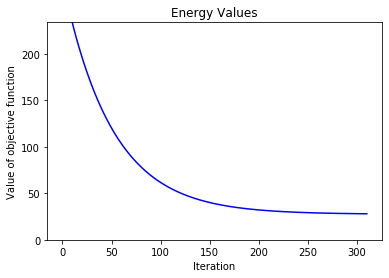

In [59]:
x = np.arange(0,itercount,1)
y= []
for i in x:
    y.append(of_val[i])
plt.title('Energy Values')
plt.ylim(0,y[10])
plt.plot(x, y, c= 'b')
plt.ylabel('Value of objective function')
plt.xlabel('Iteration')
plt.show()

After 1000 iterations of parameters update,  
we can see that the energy values(object function value) converges to almost 0.  
: -> Good, because we want to minimize it, and also find theta0, theta1 that minimizes it.

# Plotting the model parameters

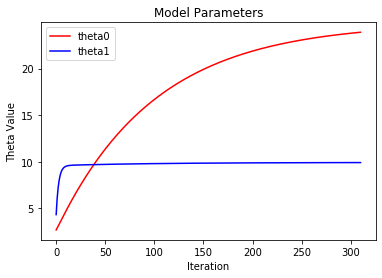

In [61]:
x = np.arange(0,itercount,1)
y= []
for i in x:
    y.append(theta[i][0])
plt.title('Model Parameters')
plt.plot(x, y, c= 'r') #theta0
plt.ylabel('Theta Value')
plt.xlabel('Iteration')

x = np.arange(0,itercount,1)
y= []
for i in x:
    y.append(theta[i][1])
plt.plot(x, y, c= 'b') #theta1
plt.legend(['theta0','theta1'])
plt.show()

We can see that theta values converge after iterations.

$h_\theta(x) = \theta_0 + \theta_1 x$,  
if the regression were done sucessfully, theta0 should be close to 10 and theta1 should be close to 2

In [62]:
print(theta0, theta1)

24.906344753024914 9.9346193932647
